### Video Games Sales Analysis
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Which genre has the most games?

In [12]:
df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

<Axes: ylabel='count'>

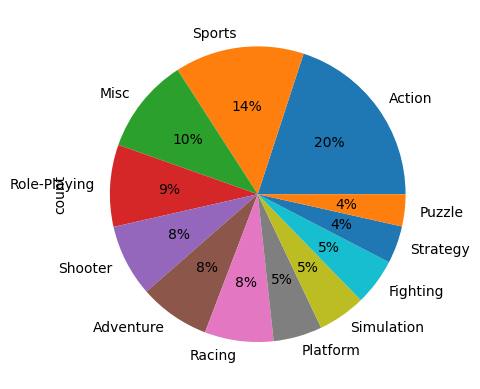

In [4]:
df['Genre'].value_counts().plot.pie(autopct = '%.0f%%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

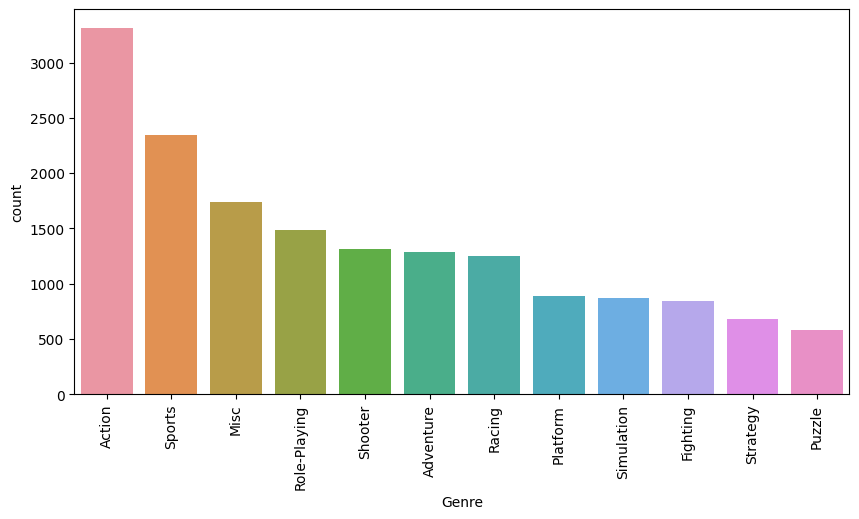

In [5]:
plt.figure(figsize=(10,5));
sns.countplot(x='Genre', data = df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)

### What year were the most games released?

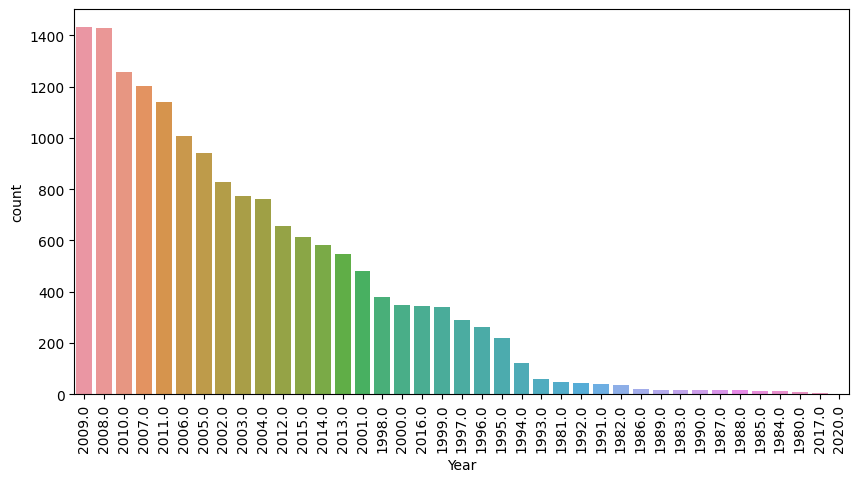

In [6]:
plt.figure(figsize = (10, 5));
sns.countplot(x = 'Year', data = df, order = df['Year'].value_counts().index);
plt.xticks(rotation = 90);

In [7]:
df['Year'].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

### What year had the highest sales in the world?

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
data_year = df.groupby(by = ["Year"])['Global_Sales'].sum()

In [15]:
data_year = data_year.reset_index()

In [16]:
data_year.iloc[1]

Year            1981.00
Global_Sales      35.77
Name: 1, dtype: float64

In [18]:
data_year[ data_year['Global_Sales']== data_year['Global_Sales'].max() ]

,Year,Global_Sales
28,2008.0,678.9


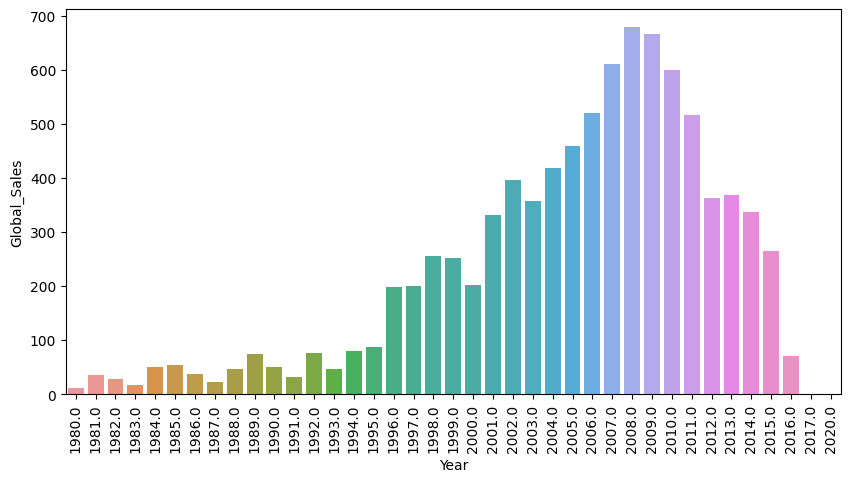

In [19]:
plt.figure(figsize = (10, 5));
sns.barplot(x = 'Year', y = 'Global_Sales', data = data_year);
plt.xticks(rotation = 90);

### What genre of games have the highest sales in the world?

In [20]:
data_genre = df.groupby(by = ["Genre"])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre[data_genre['Global_Sales']== data_genre['Global_Sales'].max()] 

,Genre,Global_Sales
0,Action,1751.18


### Which platform has the highest sales in the world? (Which platforms are popular)

In [21]:
data_platform = df.groupby(by = ["Platform"])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform[data_platform['Global_Sales']== data_platform['Global_Sales'].max()] 

,Platform,Global_Sales
16,PS2,1255.64


### Which game has the highest sales in the world?

In [22]:
data_name = df.groupby(by = ["Name"])['Global_Sales'].sum()
data_name = data_name.reset_index()
data_name[data_name['Global_Sales']== data_name['Global_Sales'].max()] 

,Name,Global_Sales
11007,Wii Sports,82.74


### Top 20 publishers (highest sales).

In [23]:
data_publisher = df.groupby(by = ["Publisher"])['Global_Sales'].sum()
data_publisher = data_publisher.reset_index()
data_publisher.sort_values(by=['Global_Sales'], ascending=False).head(20)

,Publisher,Global_Sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72
494,Take-Two Interactive,399.54
488,THQ,340.77
275,Konami Digital Entertainment,283.64
446,Sega,272.99
347,Namco Bandai Games,254.09
